# **Importing The Required Libraries - B8-2A4E**



In [ ]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset that we are going to model by using
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#flatten -used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #ConvoLutional Layer
from keras.optimizers import Adam #optimizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# **Loading The DataSet - B8-2A4E**






In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist dataset into train and test data

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels(columns)
print (x_test.shape)   #To check our dataset shape....

(60000, 28, 28)
(10000, 28, 28)


# **Understanding The DataSet - B8-2A4E**

In [ ]:
x_train[0]   #Here x_train is a normal NumPy N-D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

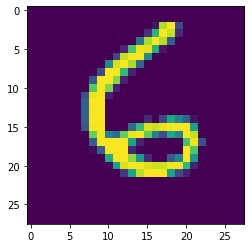

In [ ]:
plt.imshow(x_train[3999])     #Ploting the train data at index=3999 (randomly chosen)

# **Reshaping The Data  - B8-2A4E**

In [ ]:
#Reshaping to format which the  CNN  architecture accepts (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# **One Hot Encoding  - B8-2A4E**

In [ ]:
number_of_classes = 10  #storing the no of classes in a variable, here the classes are - 0,1,2,3,4,5,6,7,8 and 9

In [ ]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [ ]:
y_train[0] #Printing the new label for y

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# **Adding CNN Layers  - B8-2A4E**


In [ ]:
#create model
model=Sequential ()
#Adding convolutional layer to our Dummy Sequential model
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#Output layer with 10 neurons and activation as SoftMax activation function
model.add(Dense(number_of_classes,activation = 'softmax'))


# **Compiling The Model  - B8-2A4E**


In [ ]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


# **Train The Model  - B8-2A4E**

In [ ]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.3290 - accuracy: 0.9495 - val_loss: 0.1078 - val_accuracy: 0.9657
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0764 - accuracy: 0.9769 - val_loss: 0.0899 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.0877 - val_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 198s 106ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0947 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.1033 - val_accuracy: 0.9762


# **Observing The Metrics - B8-2A4E**


In [ ]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss , Test Accuracy) : ")
print(metrics)

Metrics (Test loss , Test Accuracy) : 
[0.10334664583206177, 0.9761999845504761]


# **Test The Model - B8-2A4E**


In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 99ms/step
[[3.3727764e-18 6.7769869e-17 1.0804476e-14 2.3811828e-07 1.3555480e-05
  1.2017592e-10 2.3059111e-18 1.8840929e-09 9.0457757e-09 9.9998617e-01]]


In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images
np.argmax(y_test[5000:5001]) #printing the actual labels

[9]


3

# **Save The Model - B8-2A4E**


In [ ]:
# Save the model
model.save('/models/project.h5')